In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import pickle
from scipy.optimize import curve_fit
from scipy.stats import norm

In [116]:
def gaussian(x, mu, sigma, N):
    return N*np.exp(-(x-mu)**2/(2*sigma**2))

def bigaus(x, N, mu, sigma, N1, mu1, sigma1):
    # N = 1/np.sqrt(2*np.pi*sigma**2)
    return N*np.exp(-(x-mu)**2/(2*sigma**2)) + N1*np.exp(-(x-mu1)**2/(2*sigma1**2))

def normal(x, N, mu, sigma):
    # N = 1/np.sqrt(2*np.pi*sigma**2)
    return N*np.exp(-(x-mu)**2/(2*sigma**2))

In [93]:
with open("../reco_timefit/histos/2124/Z ResiduesP2_M01.pkl", "rb") as file:
    res = pickle.load(file)

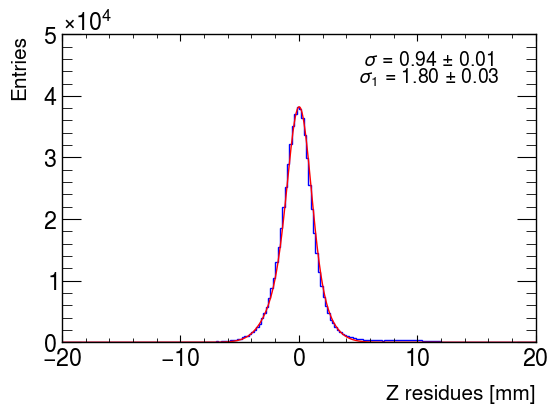

In [98]:
plt.style.use(hep.style.ATLAS)
plt.figure(figsize=(6,4), dpi = 100)
n, bins, patches = plt.hist(res, bins = 200, histtype='step', color = 'blue', range = (-20,20))
w = bins[1]-bins[0]
a = bins[0]
b = bins[-2]
x = np.linspace(a+w, b+w, len(bins)-1)
par, cov = curve_fit(bigaus, x, n, p0 = (1000, 0, 1, 100, 0, 0.1))
x = np.linspace(-20,20, 1000)
plt.plot(x, bigaus(x, *par), color = 'red', lw = 1)
# plt.annotate(text = rf' $\mu$ = {par[1]:.2f} $\pm$ {np.sqrt(cov[0][0]):.2f}', xy = (5, 4.5*10**4))
plt.annotate(text = rf' $\sigma$ = {abs(par[2]):.2f} $\pm$ {np.sqrt(cov[2][2]):.2f}', xy = (5, 4.5*10**4))
plt.annotate(text = rf'$\sigma_1$ = {abs(par[5]):.2f} $\pm$ {np.sqrt(cov[5][5]):.2f}', xy = (5, 4.20*10**4))
plt.xlabel('Z residues [mm]', fontsize = 15)
plt.ylabel('Entries', fontsize = 15)
plt.savefig('../UsefulPlots/newPlots28June/ZResolution_2124_timefit.png', dpi = 600)
plt.savefig('../UsefulPlots/newPlots28June/ZResolution_2124_timefit.pdf', dpi = 600)
plt.show()

In [99]:
with open("../reco_30holes/histos/2124/xhalfP2_M01.pkl", "rb") as file:
    ExMe = np.array(pickle.load(file))

ExMe_mean = ExMe.mean()
ExMe_std = ExMe.std()

ExMe = np.array(ExMe) - 217.87856079


with open("../reco/histos/2124/CentroidP0_RM1.pkl", "rb") as file:
    TMM = np.array(pickle.load(file))

TMM_mean = TMM.mean()
TMM_std = TMM.std()

TMM = TMM - TMM_mean

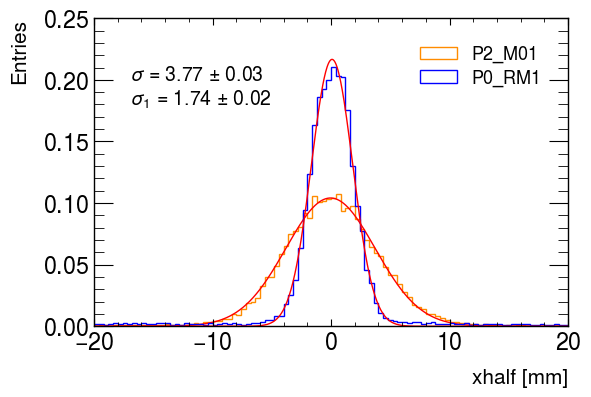

In [100]:
plt.style.use(hep.style.ATLAS)
plt.figure(figsize=(6,4), dpi = 100)
n, bins, patches = plt.hist(ExMe, bins = 100, histtype='step', color = 'darkorange', range = (-20,20), label = 'P2_M01', density = True)
w = 0.5*(bins[1]-bins[0])
a = bins[0]
b = bins[-2]
x = np.linspace(a+w, b+w, len(bins)-1)
# plt.scatter(x, n)
par, cov = curve_fit(gaussian, x, n, p0 = (0, 1, 3000))
x = np.linspace(-20,20, 1000)
plt.plot(x, gaussian(x, *par), color = 'red', lw = 1)

n, bins, patches = plt.hist(TMM, bins = 100, histtype='step', color = 'blue', range = (-20,20), label = 'P0_RM1', density = True)
w = 0.5*(bins[1]-bins[0])
a = bins[0]
b = bins[-2]
x = np.linspace(a+w, b+w, len(bins)-1)
# plt.scatter(x, n)
par1, cov1 = curve_fit(gaussian, x, n, p0 = (0, 1, 3000))
x = np.linspace(-20,20, 1000)
plt.plot(x, gaussian(x, *par1), color = 'red', lw = 1)

# plt.annotate(text = rf' $\mu$ = {par[0]:.2f} $\pm$ {np.sqrt(cov[0][0]):.2f}', xy = (10, 4.5*10**4))
plt.annotate(text = rf'$\sigma$ = {abs(par[1]):.2f} $\pm$ {np.sqrt(cov[1][1]):.2f}', xy = (-17, 0.2))
plt.annotate(text = rf'$\sigma_1$ = {abs(par1[1]):.2f} $\pm$ {np.sqrt(cov1[1][1]):.2f}', xy = (-17, 0.18))
plt.xlabel('xhalf [mm]', fontsize = 15)
plt.ylabel('Entries', fontsize = 15)
# plt.savefig('../UsefulPlots/newPlots28June/xhalf_tightpvalue.png', dpi = 600)
# plt.savefig('../UsefulPlots/newPlots28June/xhalf_tightpvalue.pdf', dpi = 600)
plt.legend(fontsize = 13)
plt.show()

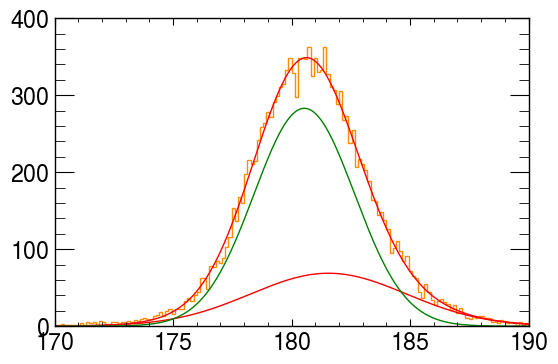

In [135]:
with open("../reco_spat_res/histos/2124/xhalf_resP2_M01.pkl", "rb") as file:
    xhalfres = np.array(pickle.load(file))
    # xhalfres -= np.mean(xhalfres)

# xhalfres
plt.style.use(hep.style.ATLAS)
plt.figure(figsize=(6,4), dpi = 100)
n, bins, patches = plt.hist(xhalfres, bins = 150, histtype='step', color = 'darkorange', range = (170,190), label = 'P2_M01')
w = 0.5*(bins[1]-bins[0])
a = bins[0]
b = bins[-2]
x = np.linspace(a+w, b+w, len(bins)-1)
# plt.scatter(x, n)
par, cov = curve_fit(bigaus, x, n, p0 = [400, 180, 1, 400, 180, 1])
x = np.linspace(170,190, 1000)
plt.plot(x, bigaus(x, *par), color = 'red', lw = 1)
plt.plot(x, normal(x, *par[0:3]), color = 'red', lw = 1)
plt.plot(x, normal(x, *par[3:6]), color = 'green', lw = 1)

# # plt.annotate(text = rf' $\mu$ = {par[0]:.2f} $\pm$ {np.sqrt(cov[0][0]):.2f}', xy = (10, 4.5*10**4))
# plt.annotate(text = rf'$\sigma$ = {abs(par[1]):.2f} $\pm$ {np.sqrt(cov[1][1]):.2f}', xy = (-17, 0.2))
# plt.annotate(text = rf'$\sigma_1$ = {abs(par1[1]):.2f} $\pm$ {np.sqrt(cov1[1][1]):.2f}', xy = (-17, 0.18))
# plt.xlabel('xhalf [mm]', fontsize = 15)
# plt.ylabel('Entries', fontsize = 15)
# # plt.savefig('../UsefulPlots/newPlots28June/xhalf_tightpvalue.png', dpi = 600)
# # plt.savefig('../UsefulPlots/newPlots28June/xhalf_tightpvalue.pdf', dpi = 600)
# plt.legend(fontsize = 13)
# plt.show()